In [1]:
# instalación de librerias y/o modulos

## Scipy
### Bajo pip -- python -m pip install scipy
### Bajo Conda -- conda install scipy

## sqlalchemy
### Bajo pip -- pip install SQLAlchemy
###             pip install sqlalchemy-utils

### Bajo Conda conda install -c anaconda sqlalchemy
###            conda install -c conda-forge sqlalchemy-utils
## Informacion del sistema
###             pip install sinfo

### streamlit
##  pip install streamlit


In [1]:

# Importaciones
import pandas as pd
import numpy as np
import scipy.stats as stats
from sqlalchemy import create_engine
import funciones as fx
from pandas import ExcelWriter
from matplotlib import pyplot as plt
import seaborn as sns
#import missingno as msngo
from sinfo import sinfo

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

from lazypredict.Supervised import LazyRegressor
#from pygam import LinearGAM, s
from sklearn.preprocessing import StandardScaler
import pickle

sns.set(rc = {'figure.figsize':(20,12)})

c:\Users\esanchez\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
funciones   NA
lazypredict 0.2.12
matplotlib  3.5.1
numpy       1.21.6
pandas      1.4.2
scipy       1.7.3
seaborn     0.11.2
sinfo       0.3.4
sklearn     1.1.3
sqlalchemy  1.4.39
-----
IPython             8.9.0
jupyter_client      8.0.2
jupyter_core        5.2.0
jupyterlab          3.3.2
notebook            6.4.8
-----
Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.25295-SP0
8 logical CPU cores, Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
-----
Session i

In [3]:
help(fx.boxplot_graph)
help(fx.conexion_sqlalchemy)

Help on function boxplot_graph in module funciones:

boxplot_graph(X, Y, Title)
    definición: funcion que realiza muestra de graficos boxplot para visualizar los OUTLIERS del dateframe
     
    X: dataframe sin vetor objetivo
    Y: vector objetivo 
    Title: titulo de grafico
     
    retorno: retorna print de graficos boxplot

Help on function conexion_sqlalchemy in module funciones:

conexion_sqlalchemy()
    definición: conexion con bd postgres
         
    retorno: retorna conexion a bd



In [4]:
help(fx.create_database)

Help on function create_database in module sqlalchemy_utils.functions.database:

create_database(url, encoding='utf8', template=None)
    Issue the appropriate CREATE DATABASE statement.
    
    :param url: A SQLAlchemy engine URL.
    :param encoding: The encoding to create the database as.
    :param template:
        The name of the template from which to create the new database. At the
        moment only supported by PostgreSQL driver.
    
    To create a database, you can pass a simple URL that would have
    been passed to ``create_engine``. ::
    
        create_database('postgresql://postgres@localhost/name')
    
    You may also pass the url from an existing engine. ::
    
        create_database(engine.url)
    
    Has full support for mysql, postgres, and sqlite. In theory,
    other database engines should be supported.



In [5]:

help(fx.graph)
help(fx.boxplot_graph)

Help on function graph in module funciones:

graph(dataframe, rows=1, cols=1)
    definición: funcion que realiza graficos de un dataset enviado como paramtero
         
    dataframe: set de datos a graficar
    
    retorno: retorna print de series del dataframe

Help on function boxplot_graph in module funciones:

boxplot_graph(X, Y, Title)
    definición: funcion que realiza muestra de graficos boxplot para visualizar los OUTLIERS del dateframe
     
    X: dataframe sin vetor objetivo
    Y: vector objetivo 
    Title: titulo de grafico
     
    retorno: retorna print de graficos boxplot



In [6]:
help(fx.selectViewComplete)
help(fx.selectViewTest)

Help on function selectViewComplete in module funciones:

selectViewComplete(conn)
    definición: funcion que realiza consulta select a vista desde postgres
     
    conn: conexion base de datos postgres
     
    retorno: retorna la consulta select de los datos completos

Help on function selectViewTest in module funciones:

selectViewTest(conn)
    definición: funcion que realiza consulta select a vista desde postgres
     
    conn: conexion base de datos postgres
     
    retorno: retorna la consulta select de los datos de test convertidos en dataframe



In [7]:
help(fx.selectViewTrain)
help(fx.report_metrics)

Help on function selectViewTrain in module funciones:

selectViewTrain(conn)
    definición: funcion que realiza consulta select a vista desde postgres
    
    conn: conexion base de datos postgres
    
    retorno: retorna la consulta select de los datos de train convertidos en dataframe

Help on function report_metrics in module funciones:

report_metrics(model, dataframeTrain, dataframeTest, vector_objetivo, titulo, modelo, segmento, key, list_model_result, df_Predict)
    definición: funcion que realiza print de metricas segun modelo envaido como parametro
     
    model: Modelo regresion 
    dataframeTrain: muestra de train
    dataframeTest: muestra de test
    vector_objetivo: columna a evaluar como vector objetivo
    titulo: titulo de print
    list_model_result: diccionario que guardara lista de modelos
    
    retorno: retorna print de metricas



In [8]:
# Conexión a BD PostgreSQL
conn = fx.conexion_sqlalchemy()

#### Preparación del ambiente de trabajo desde Bd postgres

In [9]:
# Creación de dataset de entrenamiento, testeo y EDA mediante función, la cual se conecta a BD PostgreSQL
df_train = fx.selectViewTrain(conn)
df_test = fx.selectViewTest(conn)
#df_complete = fx.selectViewComplete(conn)

#### Visualizacion general dataframe

In [10]:
df_train.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE1F52DE012636,2013,10888,19606,Long Island City,8923,NY,41,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
1,2,19VDE1F71EE003817,2014,10999,39922,Windsor,10156,CO,8,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
2,3,19UDE2F32GA001284,2016,14799,22142,Lindon,8893,UT,52,Acura,...,1229,4,gasoline,6,2359.74,144.00,4,8,generalista,1
3,4,JH4CU2F83CC019895,2012,7989,105246,Miami,9057,FL,13,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,JH4CU2F64DC006203,2013,13995,32384,West Jordan,10092,UT,52,Acura,...,2393,4,gasoline,6,2359.74,144.00,4,5,generalista,1


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618256 entries, 0 to 618255
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       618256 non-null  int64  
 1   Vin                      618256 non-null  object 
 2   Year                     618256 non-null  int64  
 3   Price                    618256 non-null  int64  
 4   Mileage                  618256 non-null  int64  
 5   City                     618256 non-null  object 
 6   City_Id                  618256 non-null  int64  
 7   State                    618256 non-null  object 
 8   State_Id                 618256 non-null  int64  
 9   Make                     618256 non-null  object 
 10  Make_Id                  618256 non-null  int64  
 11  Model                    618256 non-null  object 
 12  Model_Id                 618256 non-null  int64  
 13  Doors                    618256 non-null  int64  
 14  Fuel

In [12]:
df_test.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE2E53EE000083,2014,8995,35725,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
1,2,19VDE2E52DE000025,2013,8995,48851,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
2,3,JH4CU2F84EC002686,2014,14490,34032,Greatneck,8550,NY,41,Acura,...,2397,4,gasoline,6,2359.74,144.00,4,5,generalista,1
3,4,JH4CU2F44CC003220,2012,12921,58550,Boise,7867,ID,19,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,19VDE1F31EE009243,2014,14995,23454,Hackettstown,8583,NJ,38,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206042 entries, 0 to 206041
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       206042 non-null  int64  
 1   Vin                      206042 non-null  object 
 2   Year                     206042 non-null  int64  
 3   Price                    206042 non-null  int64  
 4   Mileage                  206042 non-null  int64  
 5   City                     206042 non-null  object 
 6   City_Id                  206042 non-null  int64  
 7   State                    206042 non-null  object 
 8   State_Id                 206042 non-null  int64  
 9   Make                     206042 non-null  object 
 10  Make_Id                  206042 non-null  int64  
 11  Model                    206042 non-null  object 
 12  Model_Id                 206042 non-null  int64  
 13  Doors                    206042 non-null  int64  
 14  Fuel

#### Division de dataframe segun rango de precios

In [14]:
listfiltro = ['Year','Price','Mileage','City_Id','State_Id','Make_Id','Model_Id','Doors','Fuel_Id',
              'Engine_Displacement_CC','Engine_Displacement_CI','Engine_Number_Cylinders','Transmission_Speeds']

In [15]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_test_generalista = df_test[df_test.Gama == 'generalista']
df_test_generalista = df_test_generalista[listfiltro]
#df_test_generalista.select_dtypes(include='number')

df_test_premium1 = df_test[df_test.Gama == 'premium_1']
df_test_premium1 = df_test_premium1[listfiltro]

df_test_premium2 = df_test[df_test.Gama == 'premium_2']
df_test_premium2 = df_test_premium2[listfiltro]

df_test_premium3 = df_test[df_test.Gama == 'premium_3']
df_test_premium3 = df_test_premium3[listfiltro]

df_test_premium4 = df_test[df_test.Gama == 'premium_4']
df_test_premium4 = df_test_premium4[listfiltro]

df_test_premium5 = df_test[df_test.Gama == 'premium_5']
df_test_premium5 = df_test_premium5[listfiltro]

df_test_premium6 = df_test[df_test.Gama == 'premium_6']
df_test_premium6 = df_test_premium6[listfiltro]

df_test_premium7 = df_test[df_test.Gama == 'premium_7']
df_test_premium7 = df_test_premium7[listfiltro]

df_test_premium8 = df_test[df_test.Gama == 'premium_8']
df_test_premium8 = df_test_premium8[listfiltro]


In [16]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_train_generalista = df_train[df_train.Gama == 'generalista']
df_train_generalista = df_train_generalista[listfiltro]

df_train_premium1 = df_train[df_train.Gama == 'premium_1']
df_train_premium1 = df_train_premium1[listfiltro]

df_train_premium2 = df_train[df_train.Gama == 'premium_2']
df_train_premium2 = df_train_premium2[listfiltro]

df_train_premium3 = df_train[df_train.Gama == 'premium_3']
df_train_premium3 = df_train_premium3[listfiltro]

df_train_premium4 = df_train[df_train.Gama == 'premium_4']
df_train_premium4 = df_train_premium4[listfiltro]

df_train_premium5 = df_train[df_train.Gama == 'premium_5']
df_train_premium5 = df_train_premium5[listfiltro]

df_train_premium6 = df_train[df_train.Gama == 'premium_6']
df_train_premium6 = df_train_premium6[listfiltro]

df_train_premium7 = df_train[df_train.Gama == 'premium_7']
df_train_premium7 = df_train_premium7[listfiltro]

df_train_premium8 = df_train[df_train.Gama == 'premium_8']
df_train_premium8 = df_train_premium8[listfiltro]

In [141]:
df_test_generalista

,Year,Price,Mileage,City_Id,State_Id,Make_Id,Model_Id,Doors,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds
0,2014,8995,35725,8307,51,1,1227,4,6,2354.00,144.00,4,6
1,2013,8995,48851,8307,51,1,1227,4,6,2354.00,144.00,4,6
2,2014,14490,34032,8550,41,1,2397,4,6,2359.74,144.00,4,5
3,2012,12921,58550,7867,19,1,2394,4,6,2359.74,144.00,4,5
4,2014,14995,23454,8583,38,1,1226,4,6,1997.00,121.90,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205931,2011,24995,42340,7826,46,58,2601,4,6,3192.00,195.28,6,0
205932,2013,24000,67696,9867,38,58,2599,4,6,3200.00,195.28,6,0
205949,2014,24423,71973,9189,47,58,2595,4,6,3000.00,183.07,6,0
205952,2015,24988,23871,9680,13,58,2436,4,6,2000.00,122.05,4,0


#### Analisis Exploratorio

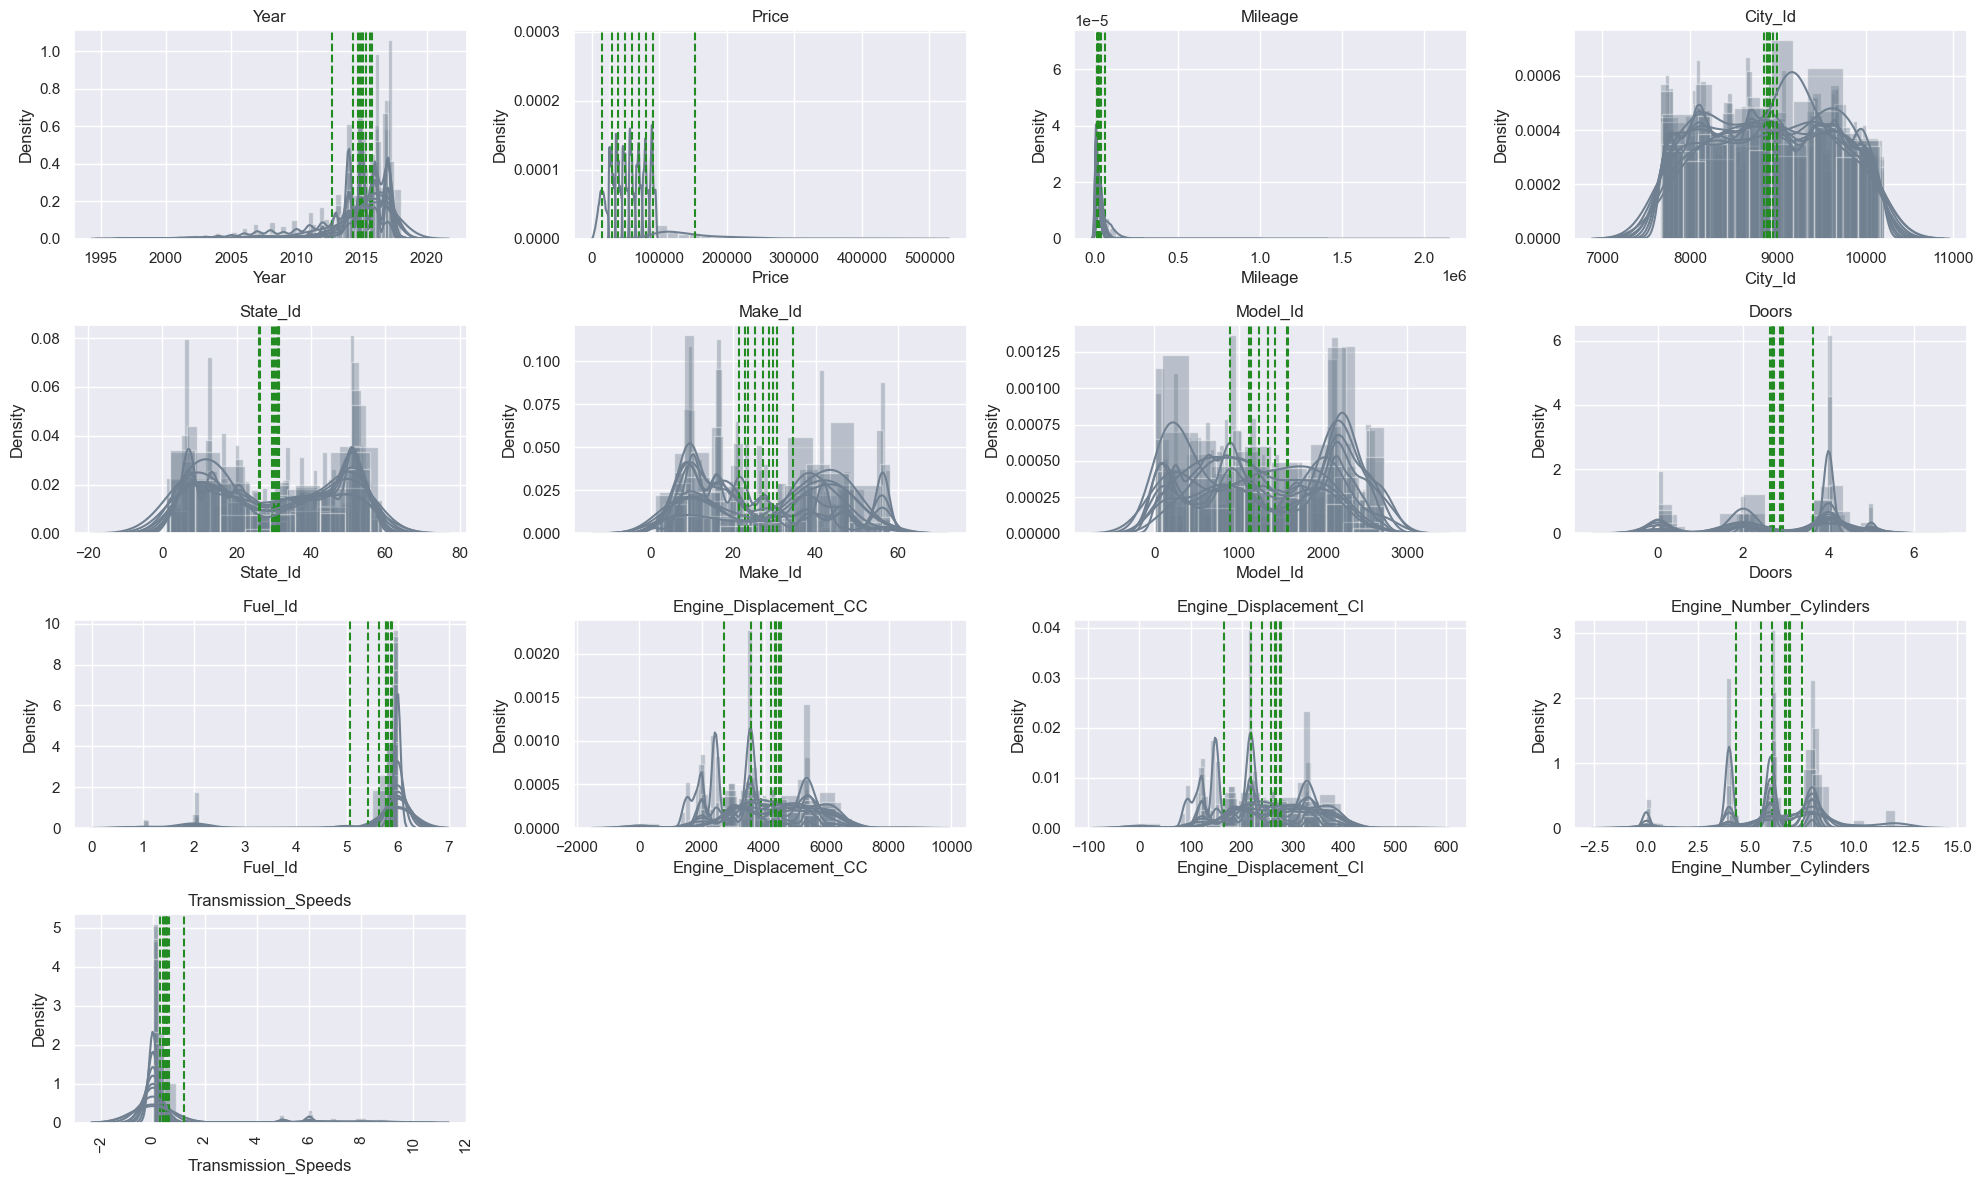

In [20]:
rows = 4
cols = 4
list_make = [df_test_generalista, df_test_premium1, df_test_premium2, df_test_premium3, df_test_premium4
             , df_test_premium5, df_test_premium6, df_test_premium7, df_test_premium8]

for index, value in enumerate(list_make):
    df_test_obj = value
    #df_test_obj = value[["Price"]]    
    fx.graph(df_test_obj, rows, cols)

<AxesSubplot:xlabel='Price', ylabel='Make'>

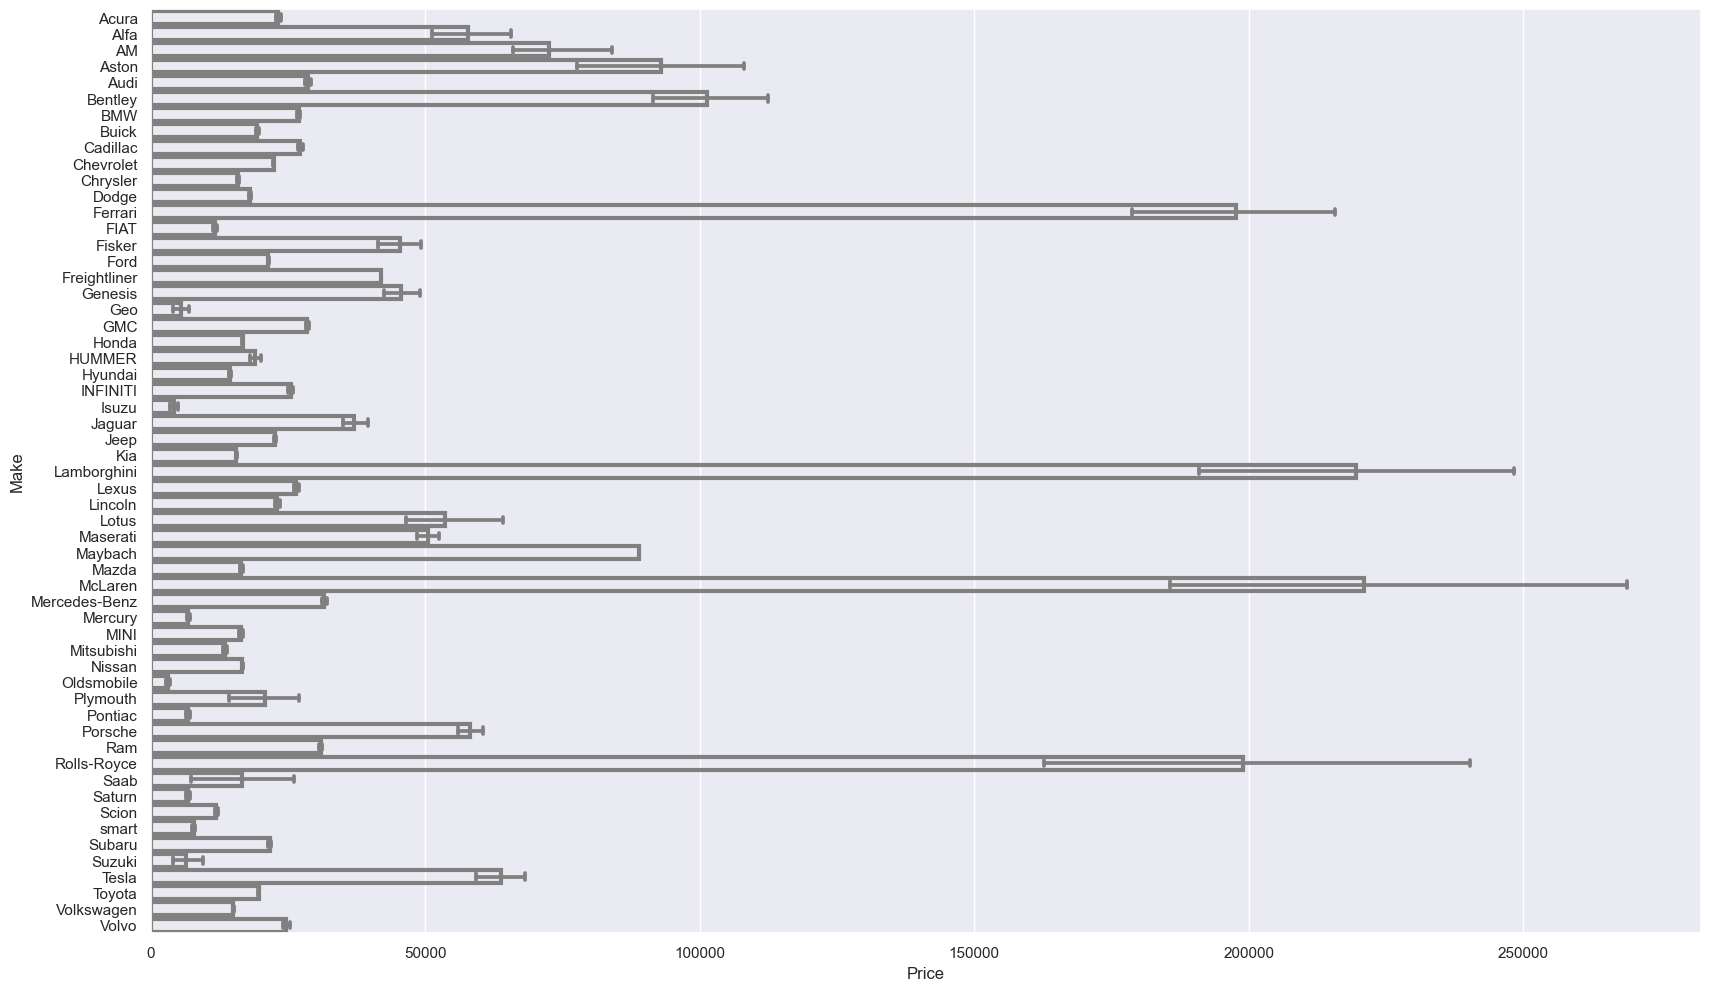

In [21]:
X = df_test.Price
Y = df_test.Make
sns.barplot(
    data=df_test, x=X, y=Y,
    capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

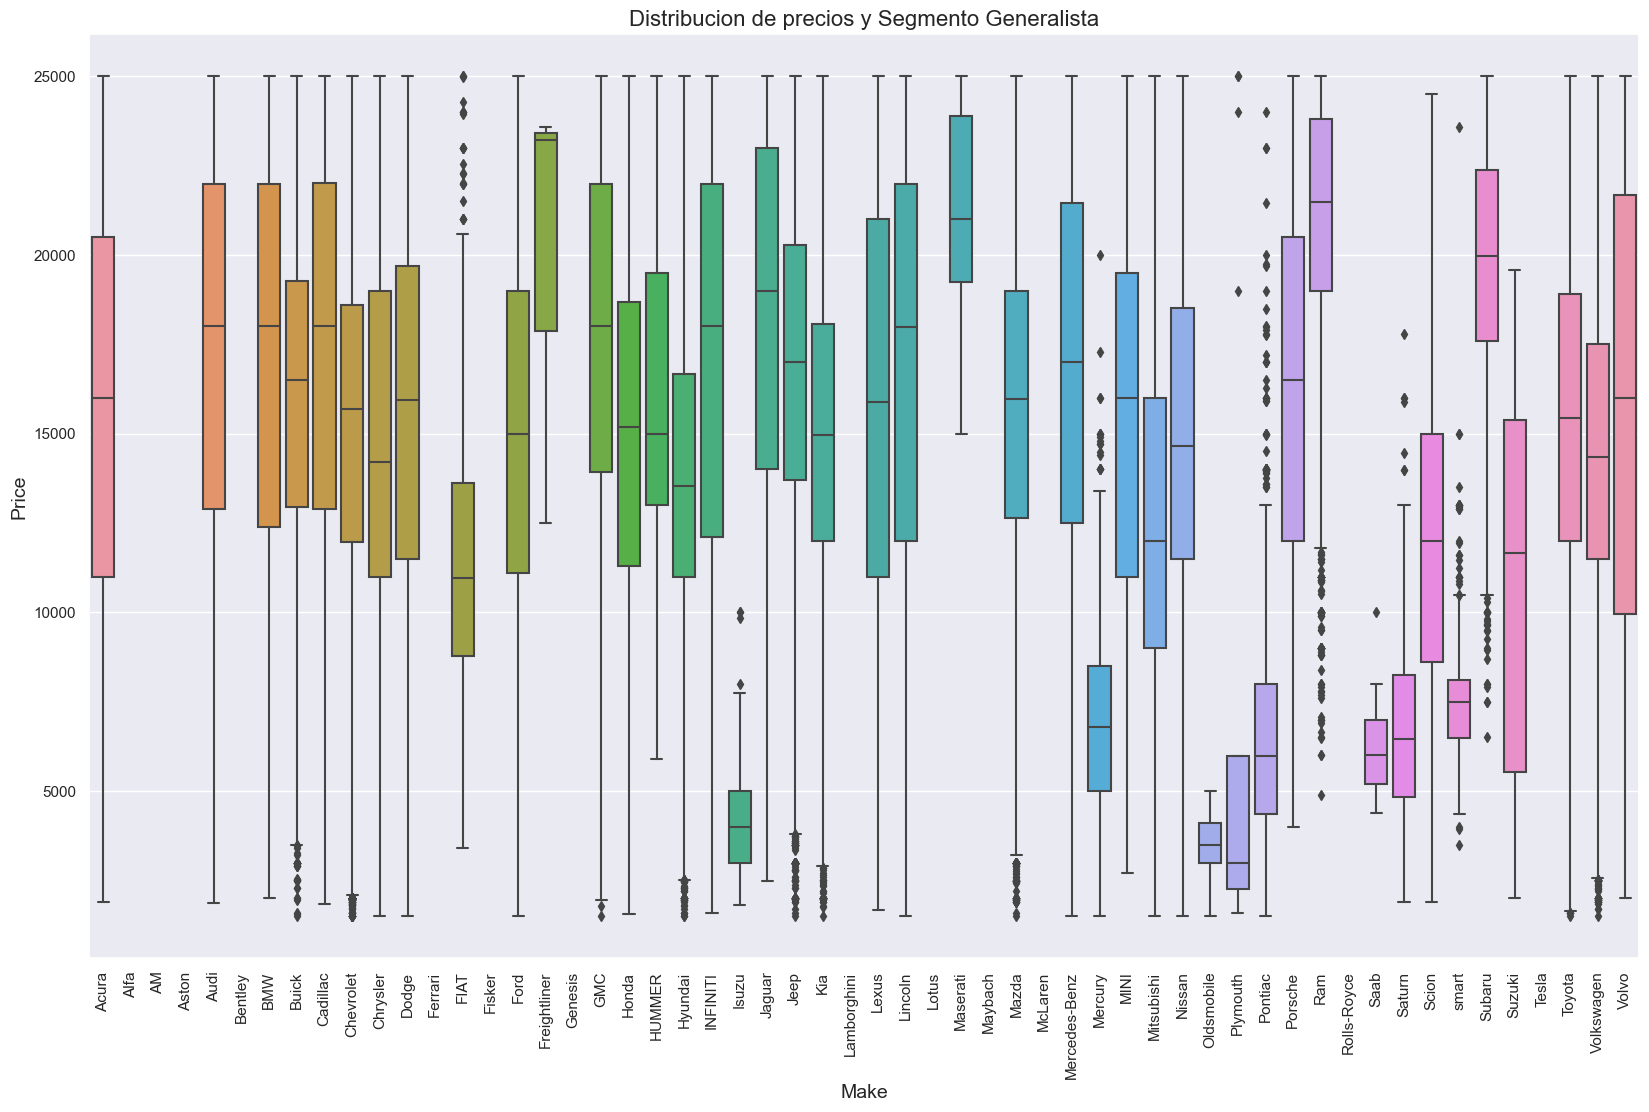

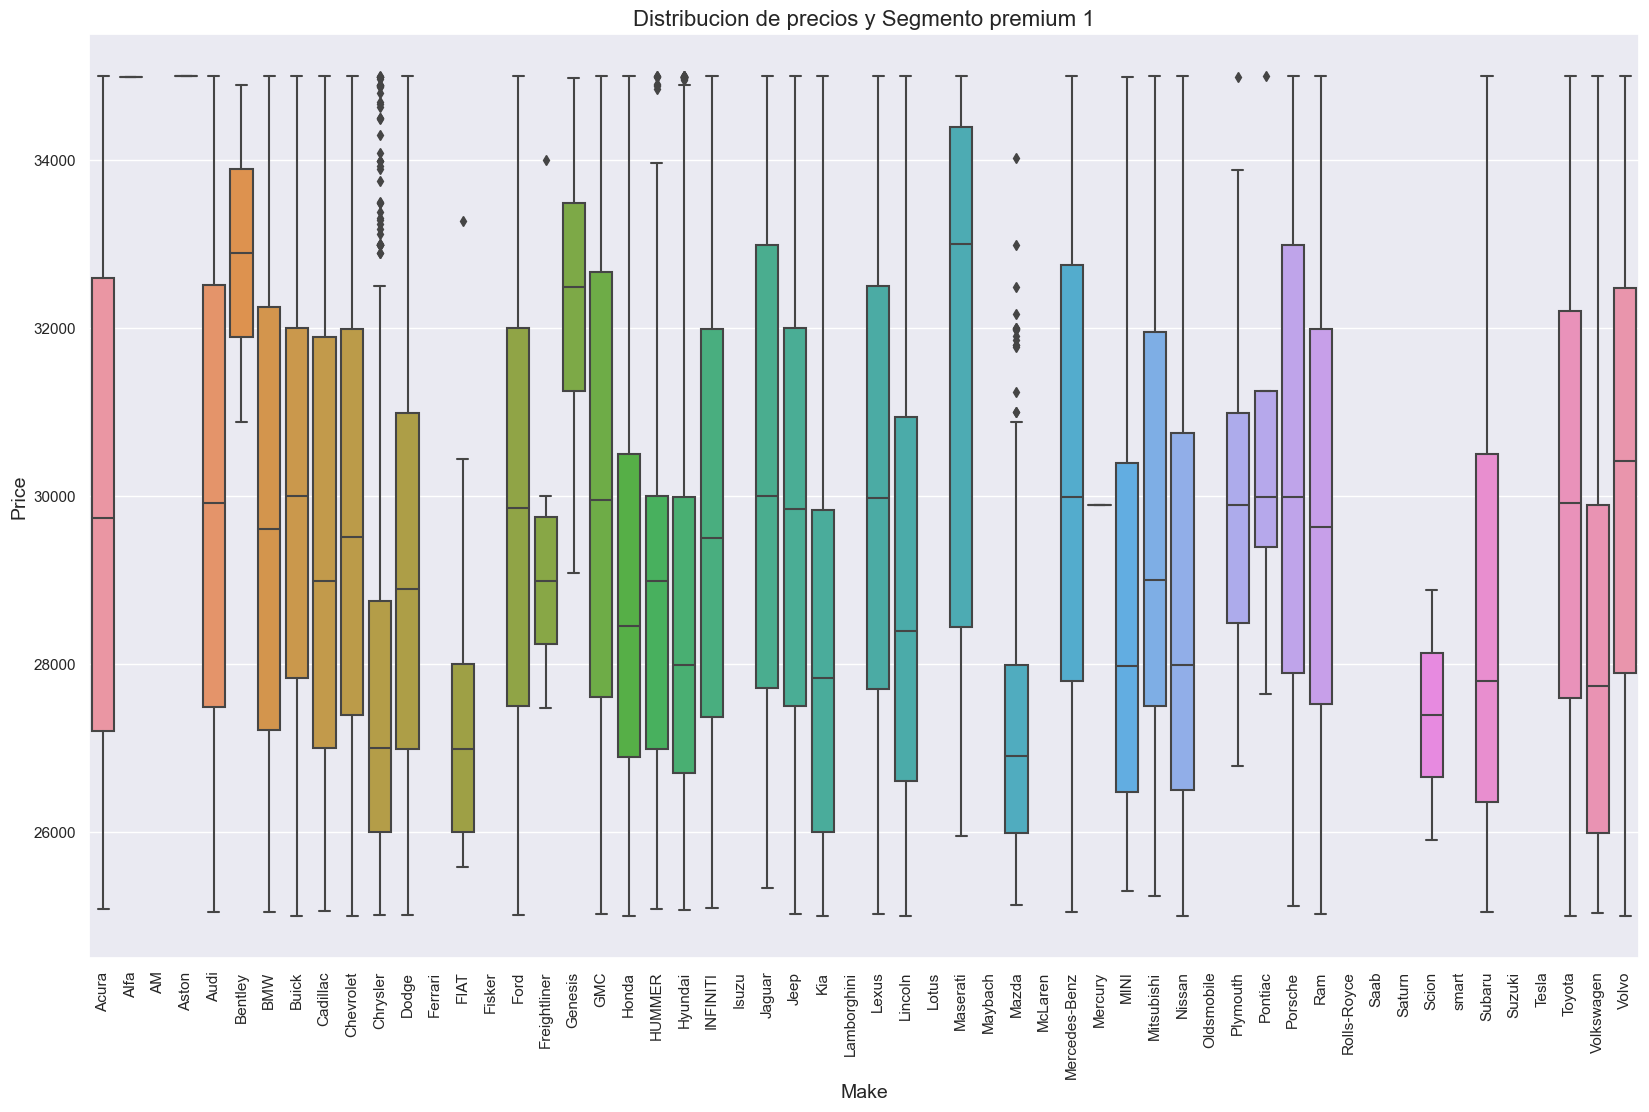

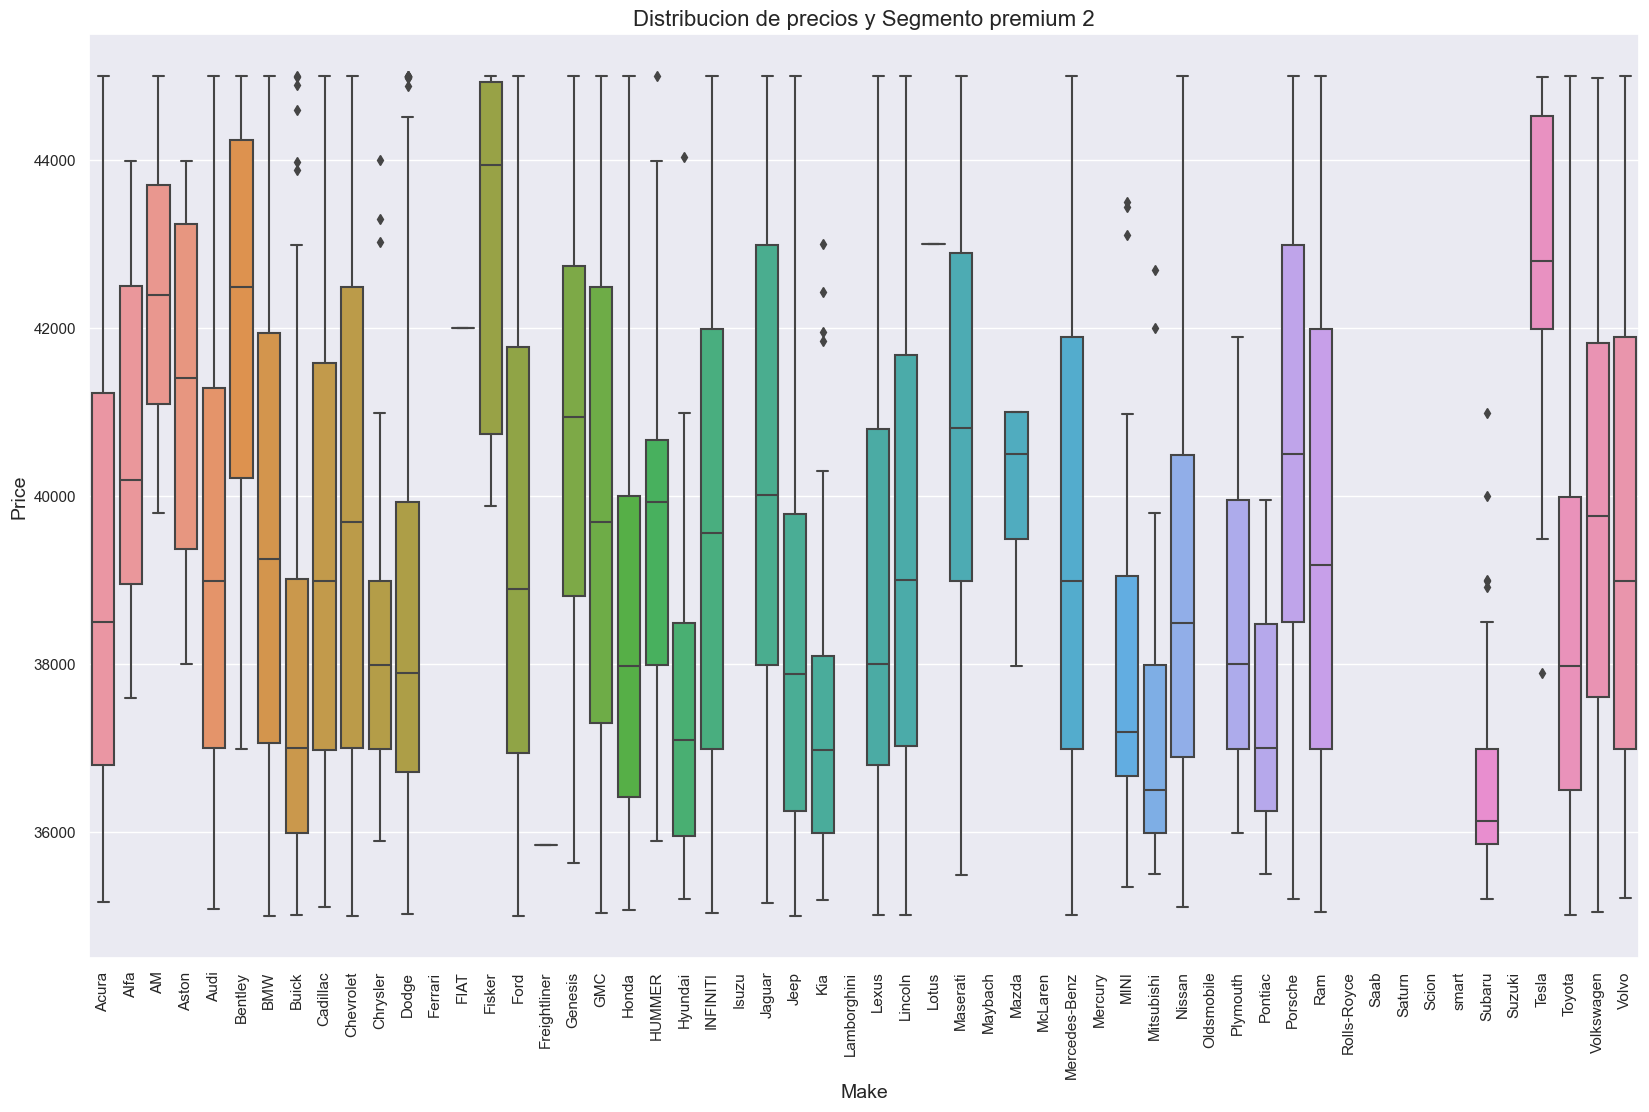

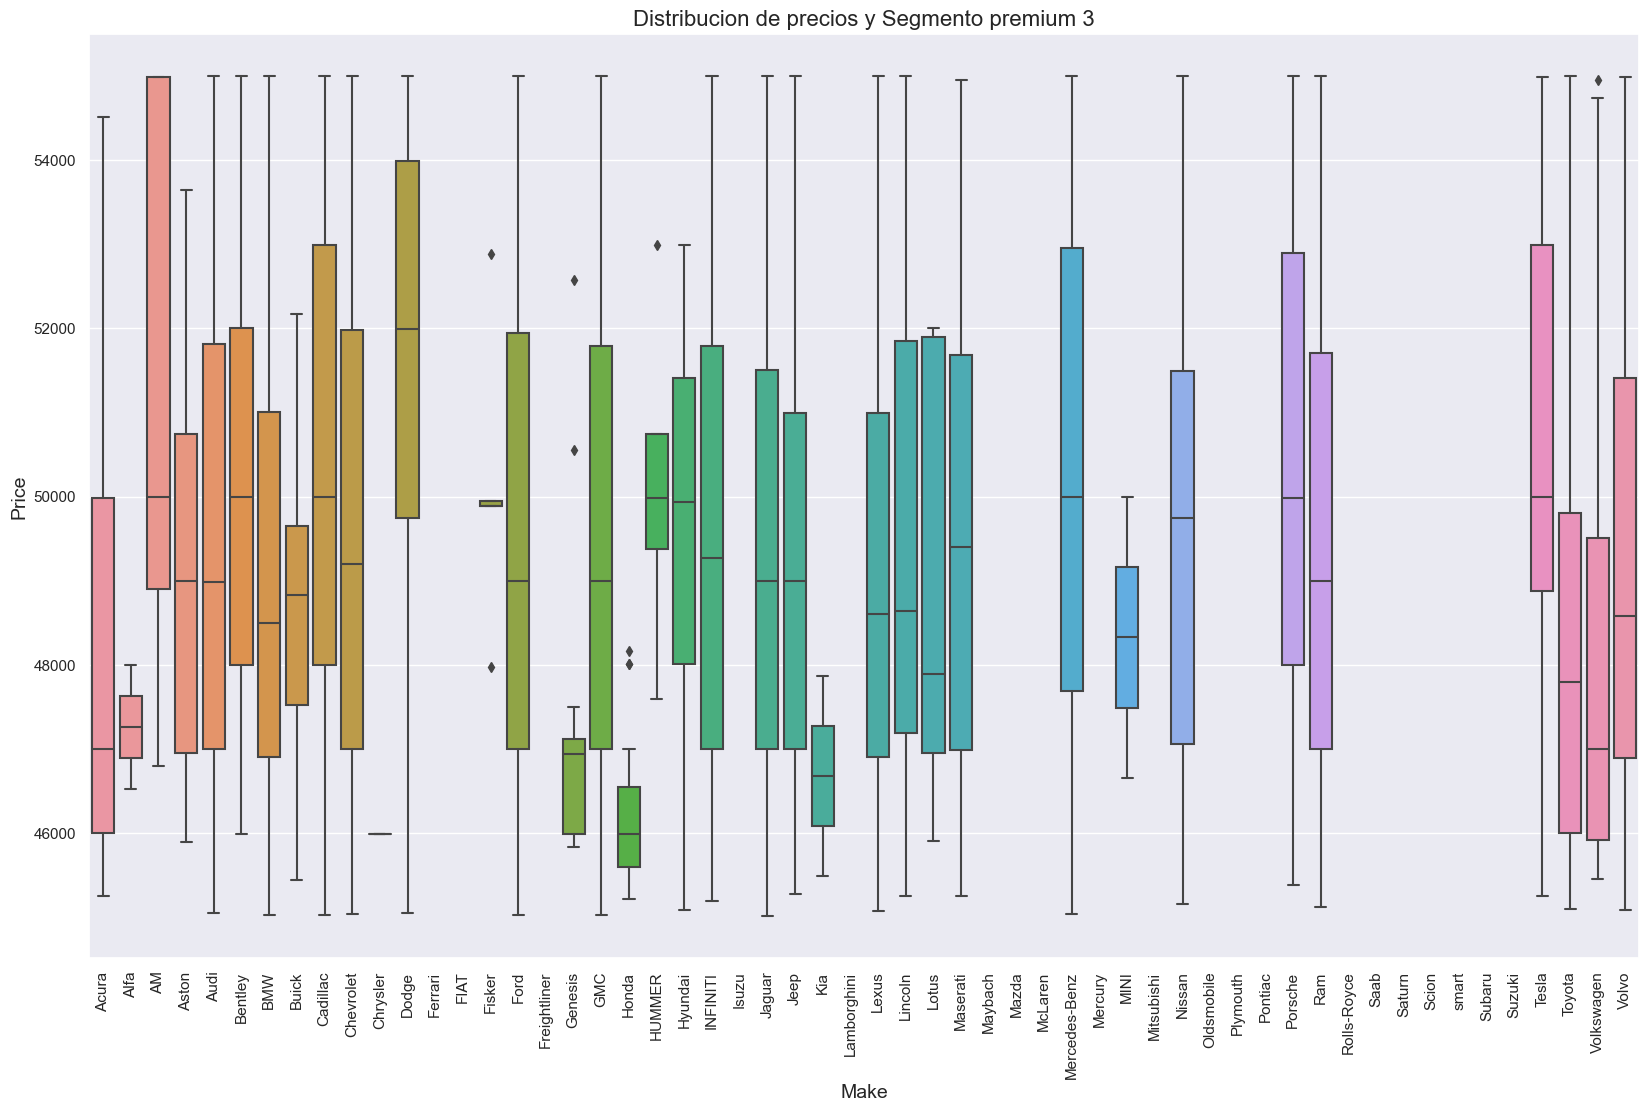

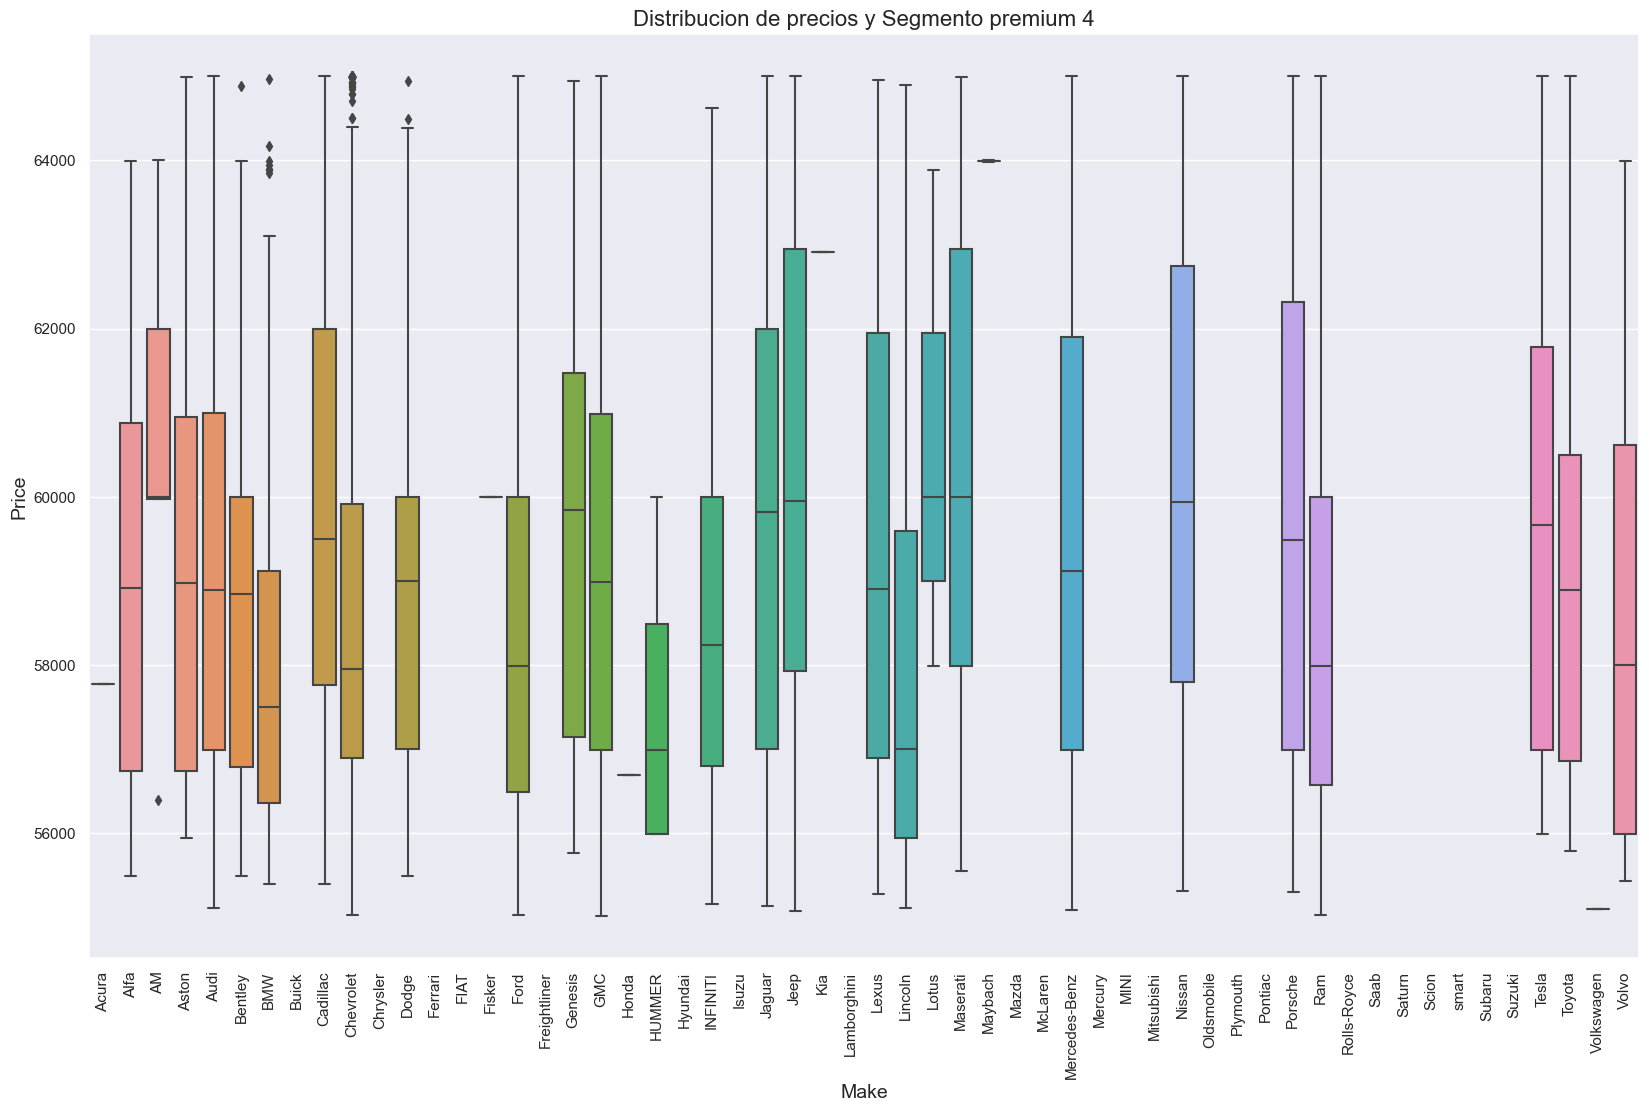

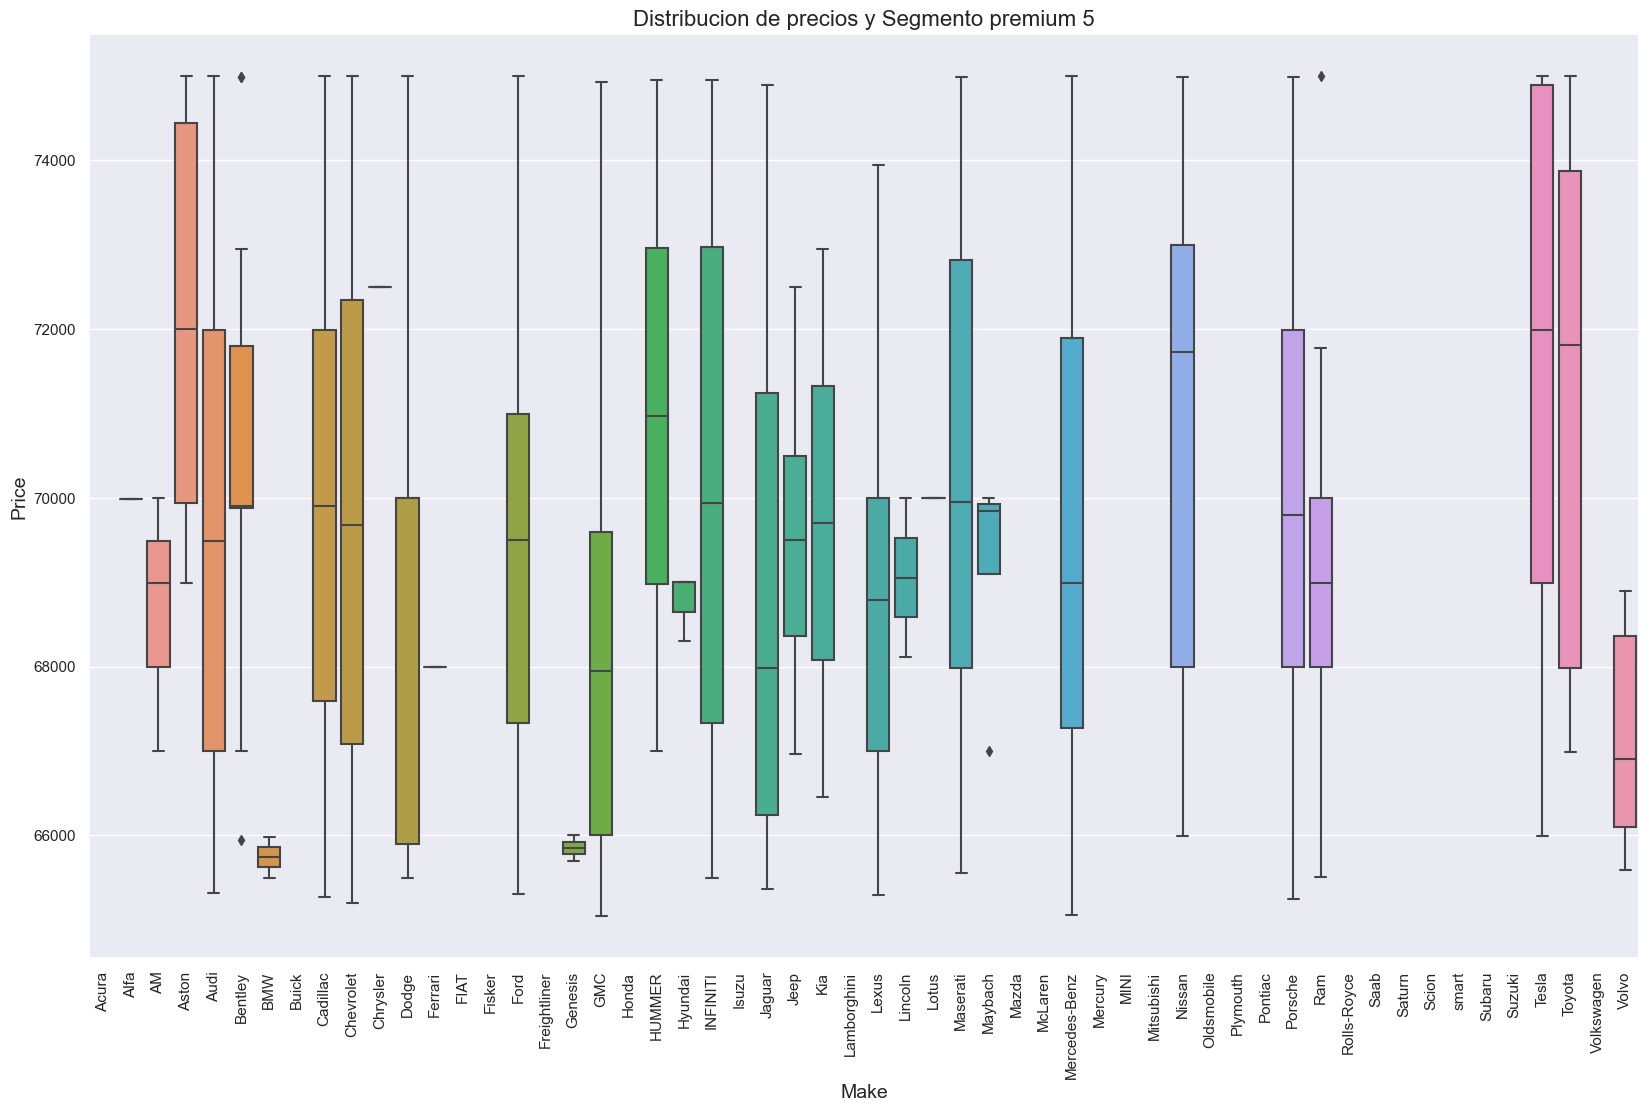

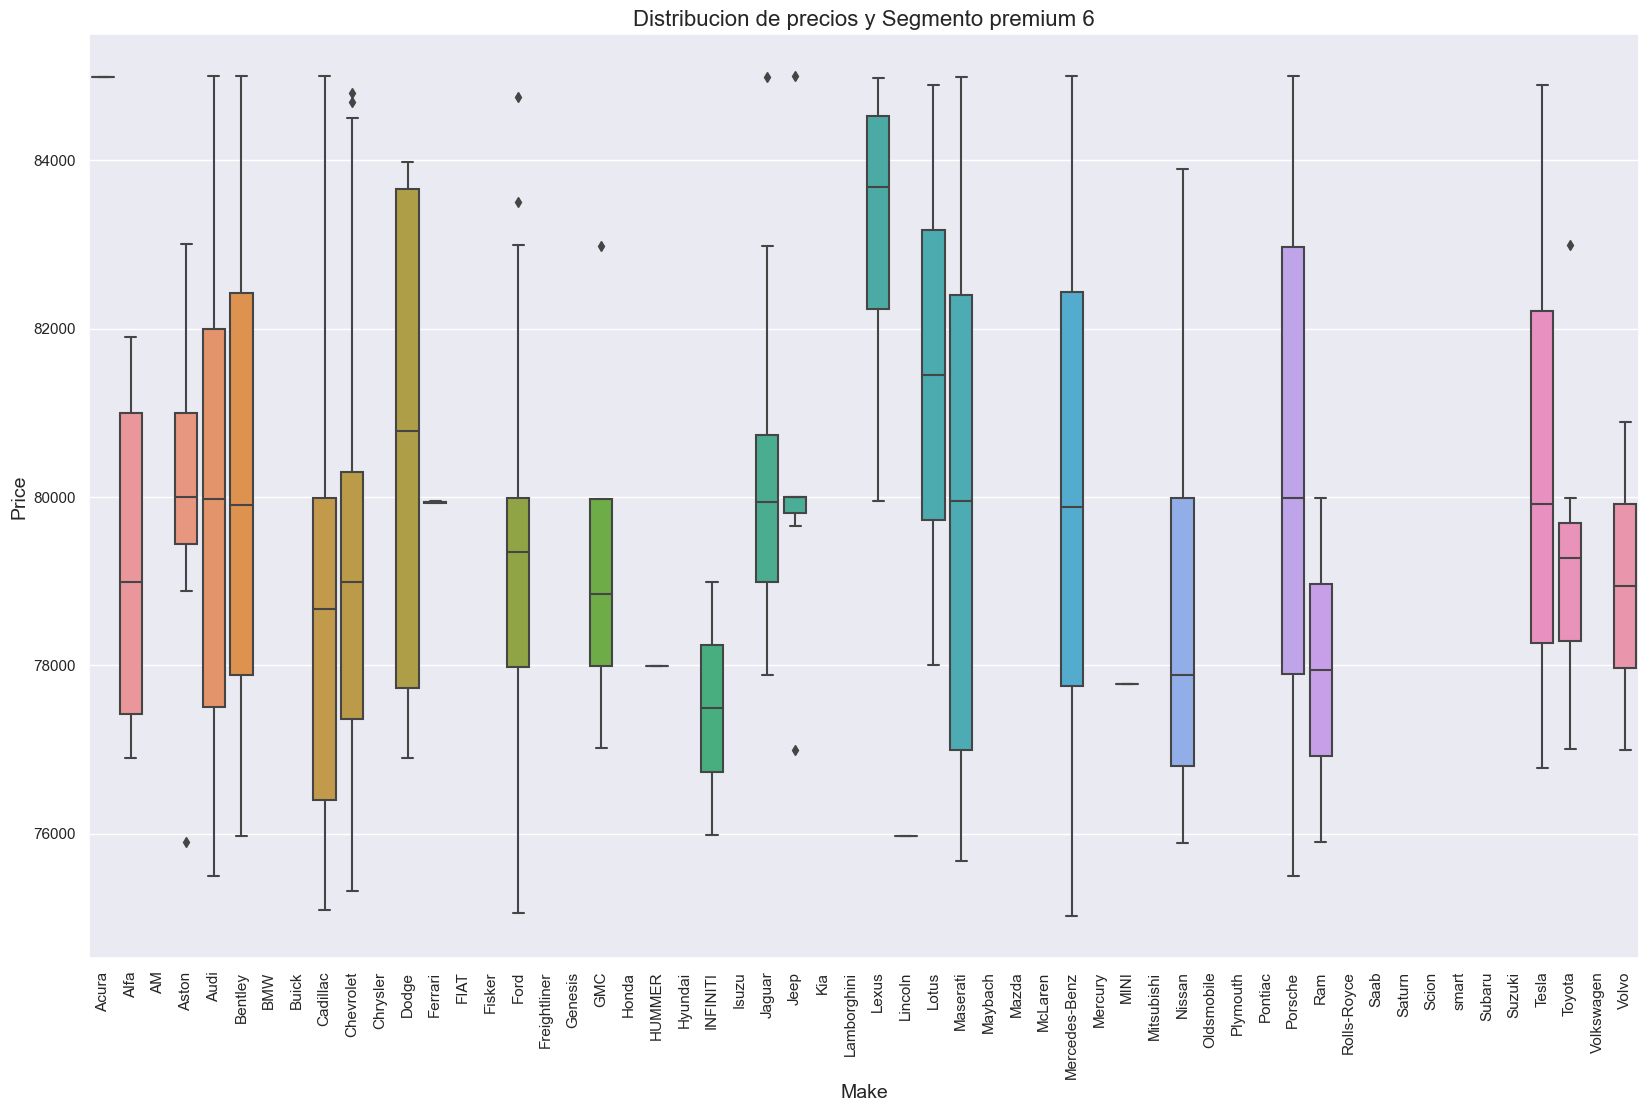

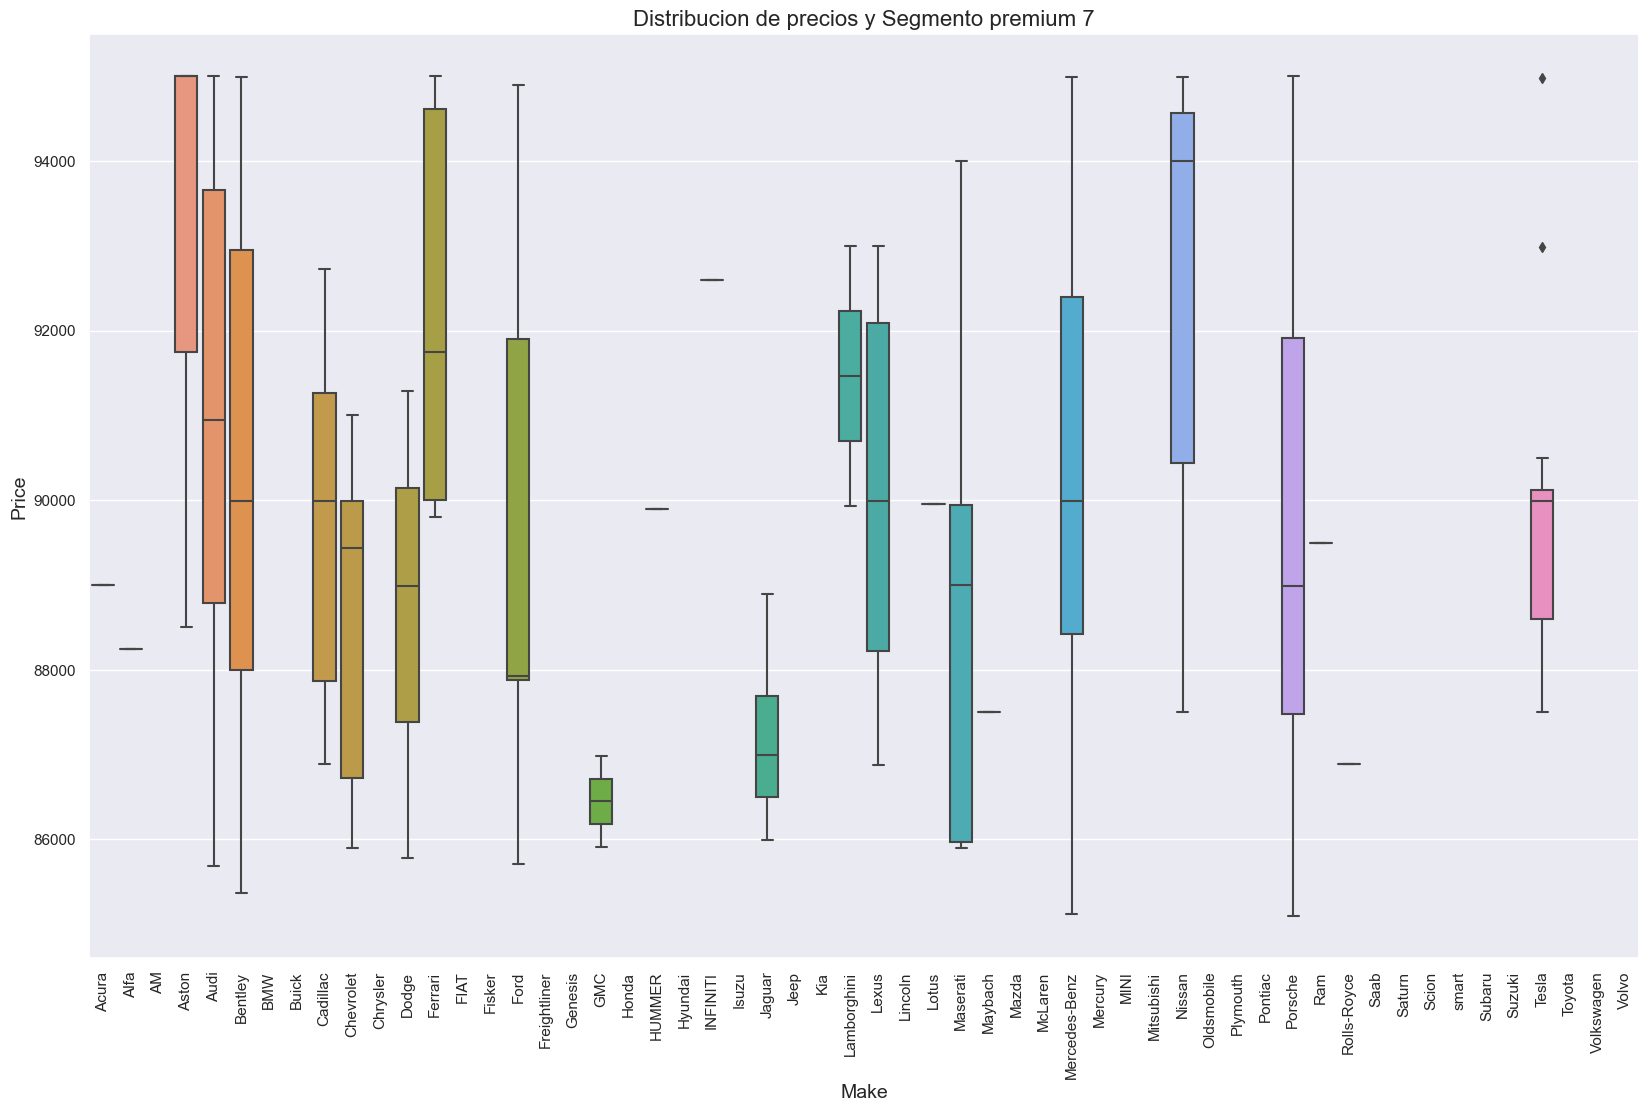

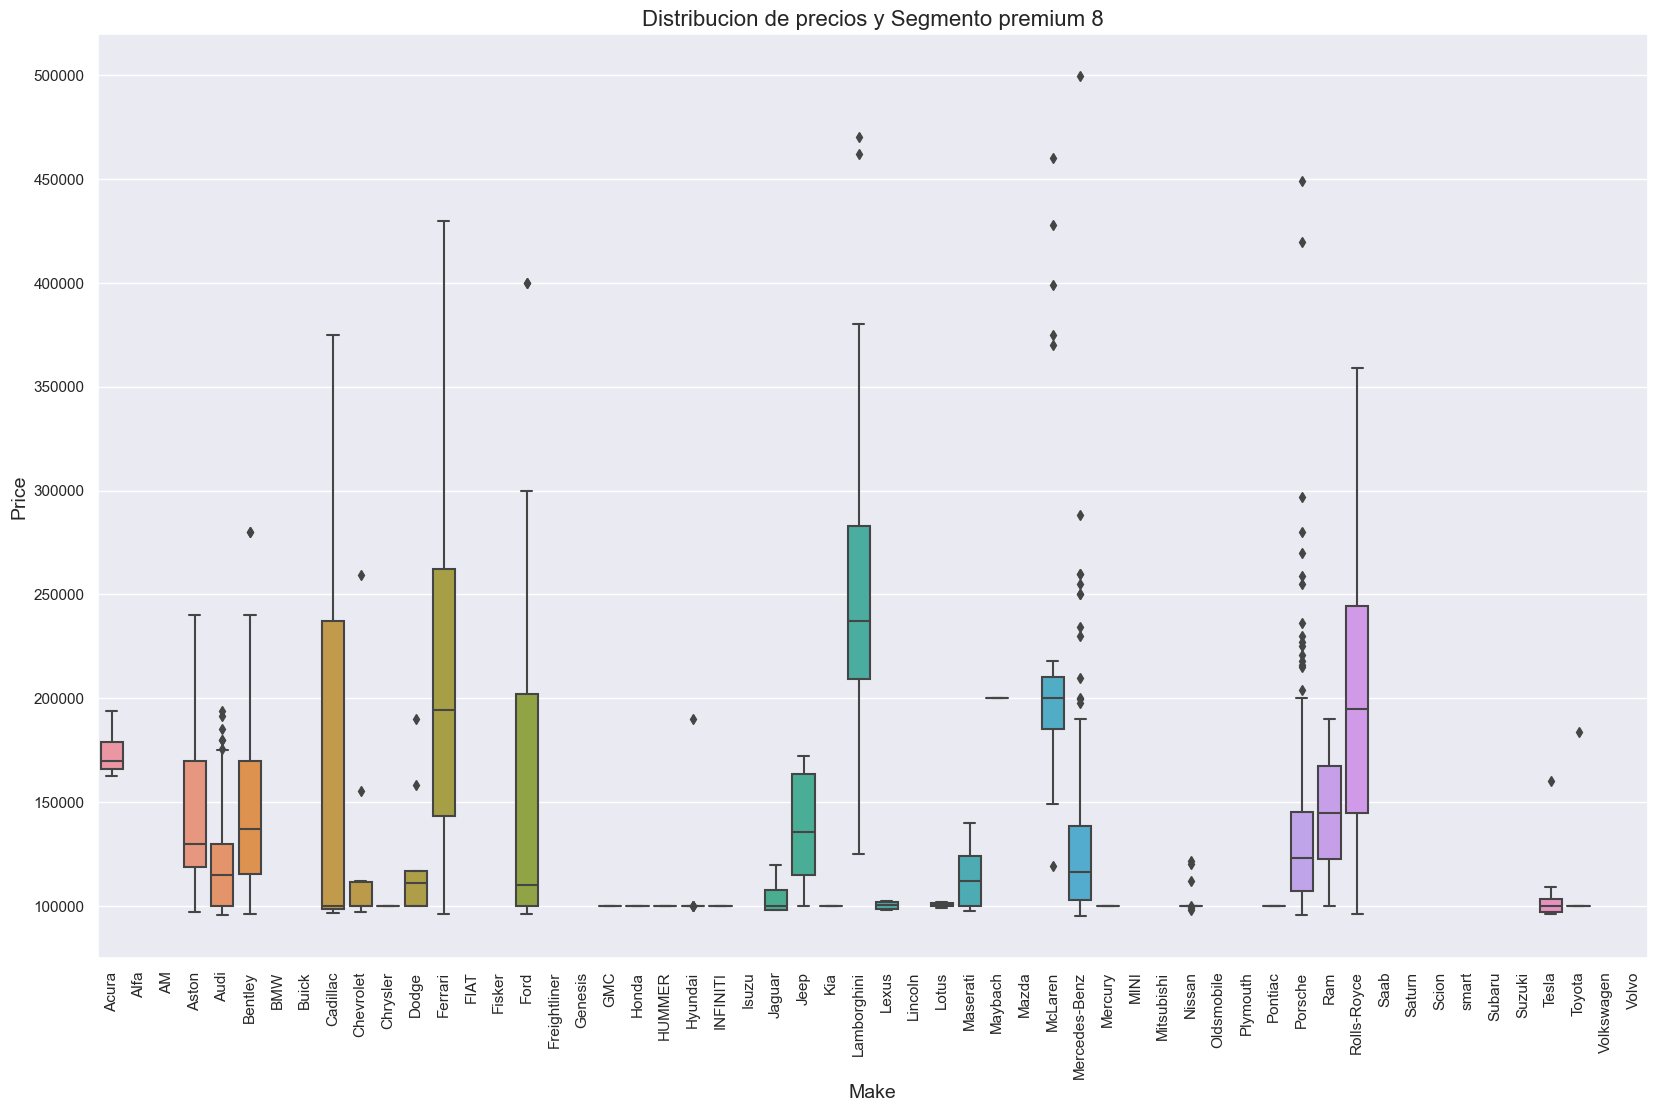

In [22]:
list_bxplot = []
list_bxplot = [df_train_generalista['Price'], df_train_premium1['Price'], df_train_premium2['Price'], df_train_premium3['Price']
               ,df_train_premium4['Price'], df_train_premium5['Price'], df_train_premium6['Price'], df_train_premium7['Price']
               ,df_train_premium8['Price']]

for index, value in enumerate(list_bxplot):
    title = ''
    if index == 0:
        title = 'Distribucion de precios y Segmento Generalista'
    else:
        title = f'Distribucion de precios y Segmento premium {index}'   

    #print(value)
    fx.boxplot_graph(df_train['Make'], value, title)

## Entrenamiento Modelos 

In [23]:
list_dt = []
list_dt = [[df_train_generalista, df_test_generalista], [df_train_premium1, df_test_premium1]
           ,[df_train_premium2, df_test_premium2], [df_train_premium3, df_test_premium3]
           ,[df_train_premium4, df_test_premium4], [df_train_premium5, df_test_premium5]
           ,[df_train_premium6, df_test_premium6], [df_train_premium7, df_test_premium7]
           ,[df_train_premium8, df_test_premium8]]

list_model_result = dict()
df_Predict = pd.DataFrame()

#### LazyPredict => LazyRegressor

#### se aplicara LazyRegressor de la libreria LazyPredict para ayudarnos a comprender que modelos funcionan mejor sin ningun ajuste de parametros.

In [24]:
X_train_model_lazy = df_train_premium8.drop(columns = ['Price'])
y_train_model_lazy = df_train_premium8['Price']

X_test_model_lazy = df_test_premium8.drop(columns = ['Price'])
y_test_model_lazy = df_test_premium8['Price']

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_lazyRegressor, predictions = reg.fit(X_train_model_lazy, X_test_model_lazy, y_train_model_lazy, y_test_model_lazy)

100%|██████████| 42/42 [00:48<00:00,  1.16s/it]


In [25]:
models_lazyRegressor

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.68,0.69,38177.68,0.33
RandomForestRegressor,0.67,0.68,38667.46,0.94
BaggingRegressor,0.66,0.67,39402.98,0.05
ExtraTreeRegressor,0.64,0.65,40276.57,0.01
HistGradientBoostingRegressor,0.63,0.64,40655.05,0.49
XGBRegressor,0.63,0.64,40746.32,0.40
LGBMRegressor,0.63,0.64,40918.95,0.20
GradientBoostingRegressor,0.63,0.64,41077.69,0.16
DecisionTreeRegressor,0.56,0.57,44591.51,0.01


#### GradientBoostingRegressor

In [26]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para GradientBoostingRegressor dataset generalista'
        key = f'GradientBoostingRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para GradientBoostingRegressor dataset premium {index}'    
        key = f'GradientBoostingRegressor_premium_{index}'
        segmento = f'premium_{index}'
      
    list_model_result, df_Predict = fx.report_metrics(GradientBoostingRegressor(random_state=11238), value[0], 
                                                    value[1], 'Price', title, "GradientBoostingRegressor", segmento, 
                                                    key, list_model_result, df_Predict)
    
    print('=============================================================')
    print('\n')

Reporte para GradientBoostingRegressor dataset generalista
    RMSE: 2741.8160825316886
    MAE: 1792.2999439805571
    R2 Score: 0.7236844259382389


Reporte para GradientBoostingRegressor dataset premium 1
    RMSE: 2471.6368324552923
    MAE: 1937.8711027874851
    R2 Score: 0.23553909367754344


Reporte para GradientBoostingRegressor dataset premium 2
    RMSE: 2559.913212107912
    MAE: 2014.6988027459884
    R2 Score: 0.18373301721876922


Reporte para GradientBoostingRegressor dataset premium 3
    RMSE: 2604.955768968993
    MAE: 2043.2404802686178
    R2 Score: 0.16021320958694907


Reporte para GradientBoostingRegressor dataset premium 4
    RMSE: 2422.541981024504
    MAE: 1741.8942837225259
    R2 Score: 0.17514251636141487


Reporte para GradientBoostingRegressor dataset premium 5
    RMSE: 2675.139274679118
    MAE: 2094.601873856067
    R2 Score: 0.07571882874440183


Reporte para GradientBoostingRegressor dataset premium 6
    RMSE: 2788.4009567886433
    MAE: 2086.2517

#### RandomForestRegressor     

In [27]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para RandomForestRegressor dataset generalista'
        key = 'RandomForestRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para RandomForestRegressor dataset premium {index}'    
        key = f'RandomForestRegressor_premium_{index}'
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(RandomForestRegressor(random_state=11238), value[0], 
                                                      value[1], 'Price', title, "RandomForestRegressor", segmento, key,
                                                      list_model_result, df_Predict)
    print('=============================================================')
    print('\n')

Reporte para RandomForestRegressor dataset generalista
    RMSE: 1944.903223466446
    MAE: 1091.6900000000005
    R2 Score: 0.8609648156416114


Reporte para RandomForestRegressor dataset premium 1
    RMSE: 2196.4800268154677
    MAE: 1423.3399999999965
    R2 Score: 0.3962731639300219


Reporte para RandomForestRegressor dataset premium 2
    RMSE: 2382.576515024185
    MAE: 1566.3199999999997
    R2 Score: 0.29290875542772254


Reporte para RandomForestRegressor dataset premium 3
    RMSE: 2467.4872684532143
    MAE: 1654.9344301948004
    R2 Score: 0.24650882019816767


Reporte para RandomForestRegressor dataset premium 4
    RMSE: 2377.3423660367675
    MAE: 1554.125
    R2 Score: 0.2056356322295675


Reporte para RandomForestRegressor dataset premium 5
    RMSE: 2670.7656953098003
    MAE: 1941.1100000000006
    R2 Score: 0.07873856878624697


Reporte para RandomForestRegressor dataset premium 6
    RMSE: 2769.977012270211
    MAE: 2076.5050000000047
    R2 Score: 0.027851570110

#### AdaBoostRegressor

In [28]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para AdaBoostRegressor dataset generalista'
        key = 'AdaBoostRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para AdaBoostRegressor dataset premium {index}'
        key = f'AdaBoostRegressor_premium_{index}'
        segmento = f'premium_{index}' 
        
    list_model_result, df_Predict = fx.report_metrics(AdaBoostRegressor(random_state=11238), value[0], value[1], 
                                                      'Price', title, "AdaBoostRegressor", segmento, key, 
                                                      list_model_result, df_Predict)
       
    print('=============================================================')
    print('\n')

Reporte para AdaBoostRegressor dataset generalista
    RMSE: 3870.2426007468907
    MAE: 2992.9324835329644
    R2 Score: 0.44943943257707275


Reporte para AdaBoostRegressor dataset premium 1
    RMSE: 2716.774322241654
    MAE: 2336.183748969266
    R2 Score: 0.07638050368965632


Reporte para AdaBoostRegressor dataset premium 2
    RMSE: 2713.1133734039736
    MAE: 2259.34126231994
    R2 Score: 0.08310916723268613


Reporte para AdaBoostRegressor dataset premium 3
    RMSE: 2824.1837769031067
    MAE: 2397.7708430369494
    R2 Score: 0.012915710220320342


Reporte para AdaBoostRegressor dataset premium 4
    RMSE: 2588.4435734949056
    MAE: 2048.978127136019
    R2 Score: 0.05829755188426111


Reporte para AdaBoostRegressor dataset premium 5
    RMSE: 2737.8017329465997
    MAE: 2209.170212765952
    R2 Score: 0.031910969251656485


Reporte para AdaBoostRegressor dataset premium 6
    RMSE: 2762.785997854018
    MAE: 2286.7537536977616
    R2 Score: 0.03289252111980334


Reporte p

#### BaggingRegressor

In [29]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para BaggingRegressor dataset generalista'
        key = 'BaggingRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para BaggingRegressor dataset premium {index}'    
        key = f'BaggingRegressor_premium_{index}'
        segmento = f'premium_{index}'    
        
    list_model_result, df_Predict = fx.report_metrics(BaggingRegressor(random_state=11238), value[0], value[1], 'Price', 
                                                      title, "BaggingRegressor", segmento, key, list_model_result, df_Predict)
       
    print('=============================================================')
    print('\n')

Reporte para BaggingRegressor dataset generalista
    RMSE: 2025.7985040870285
    MAE: 1135.7000000000007
    R2 Score: 0.849158369901102


Reporte para BaggingRegressor dataset premium 1
    RMSE: 2281.248523576164
    MAE: 1457.0
    R2 Score: 0.34877484843080575


Reporte para BaggingRegressor dataset premium 2
    RMSE: 2467.3328831216304
    MAE: 1593.9000000000015
    R2 Score: 0.2417066628603125


Reporte para BaggingRegressor dataset premium 3
    RMSE: 2542.5642137024142
    MAE: 1641.2999999999993
    R2 Score: 0.19995909579093174


Reporte para BaggingRegressor dataset premium 4
    RMSE: 2487.8871250432294
    MAE: 1607.4000000000015
    R2 Score: 0.13004329330978504


Reporte para BaggingRegressor dataset premium 5
    RMSE: 2763.707385032369
    MAE: 1906.8999999999942
    R2 Score: 0.01350377155085647


Reporte para BaggingRegressor dataset premium 6
    RMSE: 2801.9707368207823
    MAE: 2065.25
    R2 Score: 0.005264906395136992


Reporte para BaggingRegressor dataset 

#### ElasticNet

In [30]:

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para DecisionTreeRegressor dataset generalista'
        key = 'DecisionTreeRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para DecisionTreeRegressor dataset premium {index}'    
        key = f'DecisionTreeRegressor_premium_{index}'
        segmento = f'premium_{index}' 
        
    list_model_result, df_Predict = fx.report_metrics(ElasticNet(random_state=11238), value[0], value[1], 
                                                      'Price', title, "ElasticNet", segmento, key, list_model_result, df_Predict)
    
    print('=============================================================')
    print('\n')

Reporte para DecisionTreeRegressor dataset generalista
    RMSE: 3437.286144219269
    MAE: 2335.2944392724894
    R2 Score: 0.5657297290527641


Reporte para DecisionTreeRegressor dataset premium 1
    RMSE: 2729.160883385333
    MAE: 2234.782625243359
    R2 Score: 0.06793920661345076


Reporte para DecisionTreeRegressor dataset premium 2
    RMSE: 2781.0232064476577
    MAE: 2290.9159246694326
    R2 Score: 0.036634759847330334


Reporte para DecisionTreeRegressor dataset premium 3
    RMSE: 2826.479813306463
    MAE: 2355.531284436456
    R2 Score: 0.01131007622788105


Reporte para DecisionTreeRegressor dataset premium 4
    RMSE: 2623.5395292163166
    MAE: 2005.3612931435928
    R2 Score: 0.0325878898398092


Reporte para DecisionTreeRegressor dataset premium 5
    RMSE: 2748.3171023210484
    MAE: 2180.1084406201844
    R2 Score: 0.024460201012801774


Reporte para DecisionTreeRegressor dataset premium 6
    RMSE: 2808.2307601818693
    MAE: 2172.4532782891474
    R2 Score: 0.0

#### DecisionTreeRegressor

In [31]:

#max = 1000

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para DecisionTreeRegressor dataset generalista'
        key = 'DecisionTreeRegressor_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para DecisionTreeRegressor dataset premium {index}'    
        key = f'DecisionTreeRegressor_premium_{index}'
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(DecisionTreeRegressor(random_state=11238), value[0], value[1], 
                                                      'Price', title, "DecisionTreeRegressor", segmento, key, 
                                                      list_model_result, df_Predict)

    print('=============================================================')
    print('\n')

Reporte para DecisionTreeRegressor dataset generalista
    RMSE: 2642.3419664253975
    MAE: 1436.0
    R2 Score: 0.7433703866287633


Reporte para DecisionTreeRegressor dataset premium 1
    RMSE: 2974.483542511327
    MAE: 1824.0
    R2 Score: -0.10715673118328928


Reporte para DecisionTreeRegressor dataset premium 2
    RMSE: 3191.699146245319
    MAE: 1965.0
    R2 Score: -0.2688948691728774


Reporte para DecisionTreeRegressor dataset premium 3
    RMSE: 3245.766312071157
    MAE: 1996.0
    R2 Score: -0.3037755389436423


Reporte para DecisionTreeRegressor dataset premium 4
    RMSE: 3237.7288529292346
    MAE: 2000.0
    R2 Score: -0.4733883998475028


Reporte para DecisionTreeRegressor dataset premium 5
    RMSE: 3633.6774240940726
    MAE: 2602.0
    R2 Score: -0.7053128021900357


Reporte para DecisionTreeRegressor dataset premium 6
    RMSE: 3717.9788924959007
    MAE: 2180.5
    R2 Score: -0.7514352613122481


Reporte para DecisionTreeRegressor dataset premium 7
    RMSE: 

#### LinearRegression

In [32]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''
    
    if index == 0:
        title = 'Reporte para LinearRegression dataset generalista'
        key = 'LinearRegression_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para LinearRegression dataset premium {index}'    
        key = f'LinearRegression_premium_{index}' 
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(LinearRegression(), value[0], value[1], 'Price', title, 
                                                      "LinearRegression", segmento, key, list_model_result, df_Predict)
            
    print('=============================================================')
    print('\n')

Reporte para LinearRegression dataset generalista
    RMSE: 3426.5182463254164
    MAE: 2331.3581131708343
    R2 Score: 0.5684463218930635


Reporte para LinearRegression dataset premium 1
    RMSE: 2727.3313930520562
    MAE: 2227.1489540896728
    R2 Score: 0.06918839986079406


Reporte para LinearRegression dataset premium 2
    RMSE: 2778.03926768416
    MAE: 2279.4948165419482
    R2 Score: 0.038700963892586926


Reporte para LinearRegression dataset premium 3
    RMSE: 2824.0286703588667
    MAE: 2346.644235130705
    R2 Score: 0.013024130238899922


Reporte para LinearRegression dataset premium 4
    RMSE: 2620.1083137895353
    MAE: 1985.3823386739823
    R2 Score: 0.035116709146010616


Reporte para LinearRegression dataset premium 5
    RMSE: 2755.572240079362
    MAE: 2203.9579701524344
    R2 Score: 0.01930285027173051


Reporte para LinearRegression dataset premium 6
    RMSE: 2810.2958577791005
    MAE: 2184.082732870418
    R2 Score: -0.0006549216826547966


Reporte par

#### LassoCV

In [33]:

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    segmento = ''

    if index == 0:
        title = 'Reporte para LassoCV dataset generalista'
        key = 'LassoCV_generalista'
        segmento = 'generalista'
    else:
        title = f'Reporte para LassoCV dataset premium {index}'
        key = f'LassoCV_premium_{index}'
        segmento = f'premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(LassoCV(cv=3, random_state=11238), value[0], value[1], 
                                                      'Price', title, 'LassoCV', segmento, key, list_model_result, df_Predict)

    print('=============================================================')
    print('\n')

Reporte para LassoCV dataset generalista
    RMSE: 3870.059057409494
    MAE: 2574.747043733427
    R2 Score: 0.4494916511784667


Reporte para LassoCV dataset premium 1
    RMSE: 2756.6850000105014
    MAE: 2269.5285466304085
    R2 Score: 0.04904437804251327


Reporte para LassoCV dataset premium 2
    RMSE: 2798.7938517166867
    MAE: 2318.205590271704
    R2 Score: 0.02428368070979603


Reporte para LassoCV dataset premium 3
    RMSE: 2838.893328128989
    MAE: 2410.9713712455814
    R2 Score: 0.002606622627483124


Reporte para LassoCV dataset premium 4
    RMSE: 2667.3678203216896
    MAE: 2126.0051948051914
    R2 Score: -4.8589585639469135e-06


Reporte para LassoCV dataset premium 5
    RMSE: 2784.100178073863
    MAE: 2215.028447742734
    R2 Score: -0.001108219958631862


Reporte para LassoCV dataset premium 6
    RMSE: 2811.995911275588
    MAE: 2099.504437869822
    R2 Score: -0.0018659553491231495


Reporte para LassoCV dataset premium 7
    RMSE: 2669.959994375398
    MA

## Elección mejor modelo segun segmento

In [40]:
df_Predict.head(100)

,Segmento,Modelo,RMSE,MAE,R2 Score,Cantidad Filas
0,generalista,GradientBoostingRegressor,2741.82,1792.30,0.72,437973
1,premium_1,GradientBoostingRegressor,2471.64,1937.87,0.24,113138
2,premium_2,GradientBoostingRegressor,2559.91,2014.70,0.18,42299
3,premium_3,GradientBoostingRegressor,2604.96,2043.24,0.16,15621
4,premium_4,GradientBoostingRegressor,2422.54,1741.89,0.18,5005
...,...,...,...,...,...,...
67,premium_4,LassoCV,2667.37,2126.01,-0.00,5005
68,premium_5,LassoCV,2784.10,2215.03,-0.00,1617
69,premium_6,LassoCV,2812.00,2099.50,-0.00,676
70,premium_7,LassoCV,2669.96,1863.59,-0.01,381


In [61]:
list_filter = ['generalista', 'premium_1', 'premium_2', 'premium_3', 'premium_4', 
               'premium_5', 'premium_6', 'premium_7', 'premium_8']

df_min_mae = pd.DataFrame()

for index, value in enumerate(list_filter):
   df_predict_filter = df_Predict[df_Predict['Segmento'].str.contains(value)]
   
   df_predict_filter_min = df_predict_filter['MAE'].min()
   df_modelo = df_predict_filter[df_predict_filter['MAE'] ==  df_predict_filter_min]
   
   #print(df_modelo['Modelo'].values)
   #print(df_modelo['Cantidad Filas'].values)
   
   d = {'Modelo': df_modelo['Modelo'].values[0],
        'Segmento': df_modelo['Segmento'].values[0], 
        'Min MAE': df_predict_filter_min,
        'Filas': df_modelo['Cantidad Filas'].values[0]}
   
   df_min_mae = df_min_mae.append(d, ignore_index=True)
        

In [62]:
#agregar columnas porcentaje al df_filter_values
totalregistros = df_min_mae['Filas'].sum()
list_filter = []

for value in df_min_mae['Filas'].items():
     porcentaje = round((value[1]/totalregistros)*100,2)
     list_filter.append(porcentaje)


df_min_mae['Porcentaje Muestras'] = list_filter

,Modelo,Segmento,Min MAE,Filas,Porcentaje Muestras
0,RandomForestRegressor,generalista,1091.69,437973,70.84
1,RandomForestRegressor,premium_1,1423.34,113138,18.30
2,RandomForestRegressor,premium_2,1566.32,42299,6.84
3,BaggingRegressor,premium_3,1641.30,15621,2.53
4,RandomForestRegressor,premium_4,1554.12,5005,0.81
5,BaggingRegressor,premium_5,1906.90,1617,0.26
6,BaggingRegressor,premium_6,2065.25,676,0.11
7,GradientBoostingRegressor,premium_7,1587.47,381,0.06
8,DecisionTreeRegressor,premium_8,10050.00,1546,0.25


In [110]:
list_modeloSegmento = []

for i, row in df_min_mae[['Modelo','Segmento']].iterrows():
    modelo_segmento = ''
    if row.index[0] == 'Modelo':
        modelo_segmento = row.values[0]
    if row.index[1] == 'Segmento':  
        modelo_segmento = modelo_segmento+"_"+row.values[1]

    list_modeloSegmento.append(modelo_segmento)
    
df_min_mae['Modelo Segmento'] = list_modeloSegmento         

In [111]:
df_min_mae

,Modelo,Segmento,Min MAE,Filas,Porcentaje Muestras,Modelo Segmento
0,RandomForestRegressor,generalista,1091.69,437973,70.84,RandomForestRegressor_generalista
1,RandomForestRegressor,premium_1,1423.34,113138,18.30,RandomForestRegressor_premium_1
2,RandomForestRegressor,premium_2,1566.32,42299,6.84,RandomForestRegressor_premium_2
3,BaggingRegressor,premium_3,1641.30,15621,2.53,BaggingRegressor_premium_3
4,RandomForestRegressor,premium_4,1554.12,5005,0.81,RandomForestRegressor_premium_4
5,BaggingRegressor,premium_5,1906.90,1617,0.26,BaggingRegressor_premium_5
6,BaggingRegressor,premium_6,2065.25,676,0.11,BaggingRegressor_premium_6
7,GradientBoostingRegressor,premium_7,1587.47,381,0.06,GradientBoostingRegressor_premium_7
8,DecisionTreeRegressor,premium_8,10050.00,1546,0.25,DecisionTreeRegressor_premium_8


In [140]:
df_filter_values = df_min_mae[['Modelo','Filas']]
df_filter_values.groupby('Modelo').sum()

,Filas
Modelo,
BaggingRegressor,17914
DecisionTreeRegressor,1546
GradientBoostingRegressor,381
RandomForestRegressor,598415


## Serializacion Mejor Modelo Segun Segmento

In [126]:
#diccionario con modelos

list_model_result

{'GradientBoostingRegressor_generalista': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_1': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_2': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_3': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_4': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_5': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_6': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_7': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_8': GradientBoostingRegressor(random_state=11238),
 'RandomForestRegressor_generalista': RandomForestRegressor(random_state=11238),
 'RandomForestRegressor_premium_1': RandomForestRegressor(random_state=11238),
 'RandomForestRegressor_premium_2': RandomForestRegress

In [143]:
#buscar modelo en diccionario segun df_min_mae

dict_min_mae = dict()
for i, row in df_min_mae[['Modelo Segmento']].iterrows():
    dict_min_mae.update({k:v for (k,v) in list_model_result.items() if k == row.values[0]})
    

#dict_min_mae

#res = {k: v for k, v in list_model_result.items() if k.startswith('GradientBoostingRegressor')}
for index, (k,v) in enumerate(dict_min_mae.items()):
    #print(k)
    #pickle.dump(v, open(f'.\modelos\{k}.sav', 'wb'))
    pickle.dump(v, open(f'.\streamlit\modelos\{k}.sav', 'wb'))